<a href="https://colab.research.google.com/github/mrlupher/Syllabus/blob/master/Plane_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
# !pip install numpy-stl
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random

# Setup

In [ ]:
plane_0 = np.zeros(2, dtype=mesh.Mesh.dtype)

plane_0['vectors'][0] = np.array([[1, 1, 0], [-1, -1, 0], [1, -1, 0]])
plane_0['vectors'][1] = np.array([[1, 1, 0], [-1, -1, 0], [-1, 1, 0]])

# Functions

In [ ]:
# data = numpy.zeros(6, dtype=mesh.Mesh.dtype)
# data['vectors'][N] = np.ndarray

def single_subdivision(plane):
  triangles = plane['vectors']
  plane2 = np.zeros(int(2*len(triangles)), dtype=mesh.Mesh.dtype)
  l = [0,1,2]
  p1 = random.choice(l)
  l.remove(p1)
  p2 = random.choice(l)
  for i in range(len(triangles)):
    triangle = triangles[i]
    new_vertex = [0.5 * (triangle[p1][j] + triangle[p2][j]) for j in range(3)]
    tri_1 = np.array([triangle[0], triangle[1], triangle[2]])
    tri_1[p1] = new_vertex
    tri_2 = np.array([triangle[0], triangle[1], triangle[2]])
    tri_2[p2] = new_vertex
    plane2['vectors'][int(i*2)] = tri_1
    plane2['vectors'][int(i*2+1)] = tri_2
  return plane2

def plane_subdivision(plane, num_sub=5):
  for _ in range(num_sub):
    plane = single_subdivision(plane)
  return plane

# Results

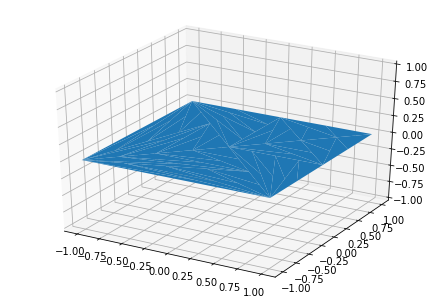

In [ ]:
plane = plane_0.copy()
plane = plane_subdivision(plane)

plane = mesh.Mesh(plane.copy())
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(plane.vectors))

# Auto scale to the mesh size
scale = plane.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()